In [14]:
! wget https://storage.googleapis.com/dhodun-public/cats_dogs/cats_dogs_data.tar.gz

--2018-02-22 19:29:38--  https://storage.googleapis.com/dhodun-public/cats_dogs/cats_dogs_data.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.201.128, 2607:f8b0:4001:c0a::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.201.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88852735 (85M) [application/x-tar]
Saving to: ‘cats_dogs_data.tar.gz.1’

cats_dogs_data.tar. 100%[===================>]  84.74M   251MB/s    in 0.3s    

2018-02-22 19:29:38 (251 MB/s) - ‘cats_dogs_data.tar.gz.1’ saved [88852735/88852735]



In [15]:
! gsutil cp gs://dhodun-public/cats_dogs/cats_dogs_data.tar.gz ~/ml-teaching-examples/cats_dogs

Copying gs://dhodun-public/cats_dogs/cats_dogs_data.tar.gz...
- [1 files][ 84.7 MiB/ 84.7 MiB]                                                
Operation completed over 1 objects/84.7 MiB.                                     


In [16]:
! tar -xzf cats_dogs_data.tar.gz 

In [17]:
import os

base_dir = '/home/dhodun/ml-teaching-examples/cats_dogs'
data_dir = os.path.join(base_dir,'data')

train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validation')
test_dir = os.path.join(data_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [18]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))

('total training cat images:', 1000)
('total validation cat images:', 500)
('total test cat images:', 500)


In [19]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

('total training dog images:', 1000)
('total validation dog images:', 500)
('total test dog images:', 500)


# Prepare Convnet

In [20]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [22]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])

## Preprocess Images

In [23]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
for data_batch, labels_batch in train_generator:
    print('data_batch_shape:', data_batch.shape)
    print('labels_batch_shape:', labels_batch.shape)
    break

('data_batch_shape:', (20, 150, 150, 3))
('labels_batch_shape:', (20,))


In [25]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=50)

# save model
model_dir = os.path.join(base_dir, 'model')
os.mkdir(model_dir)
model.save(model_dir+'/cats_dogs_small_1.h5')

Epoch 1/5
100/100 [==============================] - 8s 75ms/step - loss: 0.6903 - acc: 0.5305 - val_loss: 0.6722 - val_acc: 0.6030
Epoch 2/5
100/100 [==============================] - 7s 69ms/step - loss: 0.6571 - acc: 0.6065 - val_loss: 0.6459 - val_acc: 0.6130
Epoch 3/5
100/100 [==============================] - 7s 69ms/step - loss: 0.6101 - acc: 0.6700 - val_loss: 0.6053 - val_acc: 0.6850
Epoch 4/5
100/100 [==============================] - 7s 69ms/step - loss: 0.5695 - acc: 0.7020 - val_loss: 0.6009 - val_acc: 0.6750
Epoch 5/5
100/100 [==============================] - 7s 69ms/step - loss: 0.5395 - acc: 0.7325 - val_loss: 0.5895 - val_acc: 0.6790


OSError: [Errno 17] File exists: '/home/dhodun/ml-teaching-examples/cats_dogs/model'

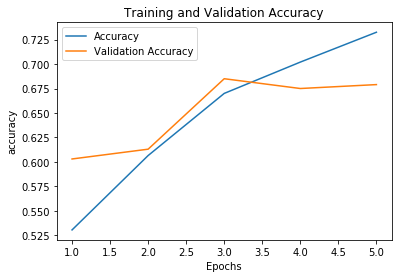

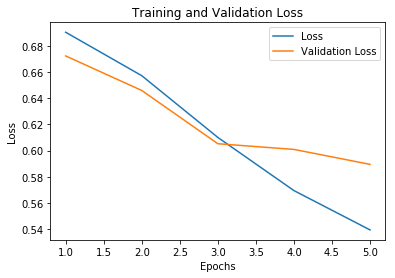

In [26]:
%matplotlib inline

from util import print_curves
print_curves(history)